In [ ]:
Data Preparation

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

# Define the path to the data folder on your local PC
data_folder = r"D:\DATA"

# Define classes to capture
classes_to_capture = ["A", "B", "C"]

# Function to preprocess images
def preprocess_images(folder):
    images = []
    labels = []

    for class_name in os.listdir(folder):
        class_folder = os.path.join(folder, class_name)
        for img_name in os.listdir(class_folder)[:100]:  # Take first 100 images per class
            img_path = os.path.join(class_folder, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # Read images in color
            img = cv2.resize(img, (224, 224))  # Resize to VGG input size
            img = img[..., ::-1]  # Convert BGR to RGB
            img = img / 255.0  # Normalize pixel values
            images.append(img)
            labels.append(classes_to_capture.index(class_name))

    return np.array(images), np.array(labels)

# Preprocess data
data_images, data_labels = preprocess_images(data_folder)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_images, data_labels, test_size=0.3, random_state=42)


In [ ]:
Model Training

In [2]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam

# Load the pre-trained VGG16 model without the top classification layer
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
vgg_base.trainable = False

# Add a custom classification head
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes_to_capture), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step - accuracy: 0.4994 - loss: 2.4658 - val_accuracy: 0.9222 - val_loss: 0.2102
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.8544 - loss: 0.4448 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.9497 - loss: 0.0835 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.9982 - loss: 0.0191 - val_accuracy: 1.0000 - val_loss: 8.4090e-04
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 1.0000 - val_loss: 1.8495e-04
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 1.0000 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 2.1619e-04
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 1.0000 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 1.6813e-04
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 1.0000 - loss: 0.0059 - val_accuracy: 1.0000 - val_loss:

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - accuracy: 0.4116 - loss: 2.6077 - val_accuracy: 0.9444 - val_loss: 0.1957
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.8411 - loss: 0.3876 - val_accuracy: 0.9889 - val_loss: 0.0173
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.9468 - loss: 0.1355 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.9812 - loss: 0.0694 - val_accuracy: 1.0000 - val_loss: 0.0139
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.9974 - loss: 0.0268 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 1.0000 - loss: 0.0084 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.9982 - loss: 0.0141 - val_accuracy: 1.0000 - val_loss: 7.5120e-04
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 1.0000 - loss: 0.0089 - val_accuracy: 1.0000 - val_loss: 6.3154e-04


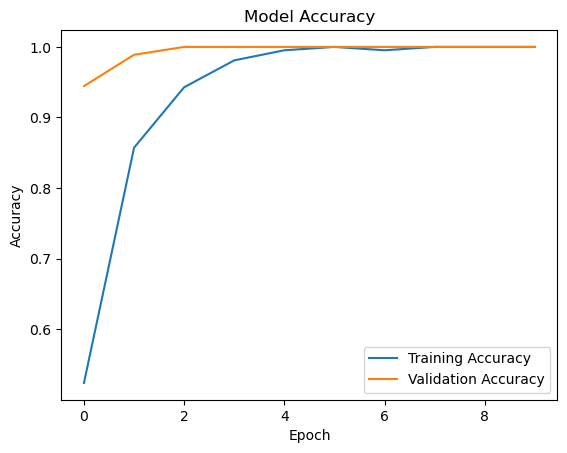

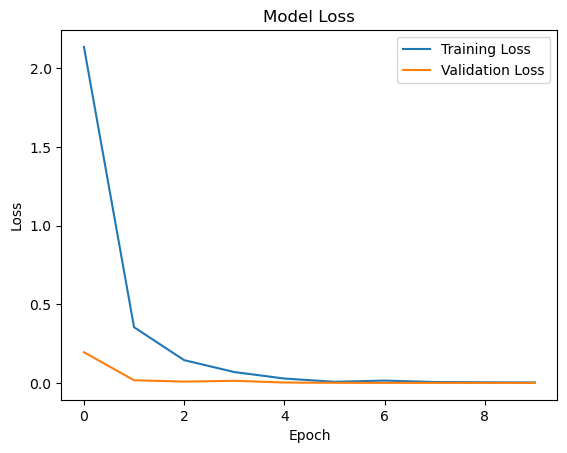

In [5]:
import matplotlib.pyplot as plt

# Load the pre-trained VGG16 model without the top classification layer
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
vgg_base.trainable = False

# Add a custom classification head
model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(classes_to_capture), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
Model Evaluation and Saving

In [3]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

# Save the trained model
model.save("hand_signs_model_vgg_updated.h5")
print("Trained model saved successfully.")


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 1.0000 - loss: 4.3163e-05


Test Accuracy: 1.0
Trained model saved successfully.


In [ ]:
Inference with Webcam

In [4]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model("hand_signs_model_vgg_updated.h5")

# Define the classes
classes_to_capture = ["A", "B", "C"]

# Function to preprocess the captured frame
def preprocess_frame(frame):
    # Resize the frame to match the input size of the model
    resized_frame = cv2.resize(frame, (224, 224))
    # Convert the frame to RGB (VGG model takes RGB images)
    resized_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)
    # Normalize the pixel values
    normalized_frame = resized_frame / 255.0
    # Expand dimensions to match the input shape of the model and add batch dimension
    preprocessed_frame = np.expand_dims(normalized_frame, axis=0)
    return preprocessed_frame

# Open the webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # Preprocess the frame
    preprocessed_frame = preprocess_frame(frame)
    
    # Predict the sign
    prediction = model.predict(preprocessed_frame)
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    # Get the class label
    predicted_label = classes_to_capture[predicted_class_index]
    
    # Display the predicted letter on the frame
    cv2.putText(frame, predicted_label, (frame.shape[1] - 150, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    # Display the frame with the predicted letter
    cv2.imshow('Sign Language Recognition', frame)
    
    # Check for the 'q' key to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close OpenCV windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 732ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [6]:
%pwd

'C:\\Users\\AIO'